# America Company Bankrupt Prediction Stochastic Gradien Descent Best (3)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pyforest import *

In [3]:
# library dibawah sebenarnya udah ada di pyforest
from sklearn.model_selection       import train_test_split
from sklearn.feature_selection     import SelectKBest, f_classif
from sklearn.preprocessing         import MinMaxScaler, StandardScaler
from sklearn.preprocessing         import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline              import make_pipeline
from sklearn.compose               import ColumnTransformer
from sklearn.metrics               import (f1_score,
                                           precision_score,
                                           recall_score,
                                           log_loss,
                                           accuracy_score,
                                           classification_report,
                                           ConfusionMatrixDisplay,
                                           confusion_matrix)


from sklearn.ensemble              import StackingClassifier
from sklearn.pipeline              import Pipeline
from sklearn.preprocessing         import StandardScaler
from sklearn_pandas                import DataFrameMapper
from sklearn.ensemble              import AdaBoostClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.linear_model          import LogisticRegression
from matplotlib.colors             import ListedColormap
from sklearn.linear_model          import SGDClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.linear_model          import SGDClassifier
from sklearn.svm                   import SVC
from sklearn.naive_bayes           import GaussianNB
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.neighbors             import NeighborhoodComponentsAnalysis
from keras.callbacks               import EarlyStopping

In [4]:
import tensorflow as tf #cek versi tensorflow
print(tf.__version__)

2.15.0


In [ ]:
!pip install pandas --upgrade

In [5]:
X_train         = pd.read_csv('/kaggle/input/bankrupt-2/data/X_train.csv')
X_train_balance = pd.read_csv('/kaggle/input/bankrupt-2/data/X_train_balance.csv')
X_test          = pd.read_csv('/kaggle/input/bankrupt-2/data/X_test.csv')

y_train         = pd.read_csv('/kaggle/input/bankrupt-2/data/y_train.csv')
y_train_balance = pd.read_csv('/kaggle/input/bankrupt-2/data/y_train_balance.csv')
y_test          = pd.read_csv('/kaggle/input/bankrupt-2/data/y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
X_train_balance.shape

(110260, 14)

In [7]:
print(y_train_balance.value_counts(normalize=True))

bankrupt
0.0         0.5
1.0         0.5
Name: proportion, dtype: float64


In [8]:
print(y_train.value_counts(normalize=True))

bankrupt
0.0         0.934233
1.0         0.065767
Name: proportion, dtype: float64


Penerapan dari teknik sampling/balancing data tersebut dengan menggunakan SMOTE dengan strategi 'auto' dapat membuat atau meningkatkan sampel sintesis dalam kelas minoritas yaitu 'bankrupt' = 1

In [9]:
X_train.shape

(59011, 14)

In [11]:
ccount = y_train_balance['bankrupt'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

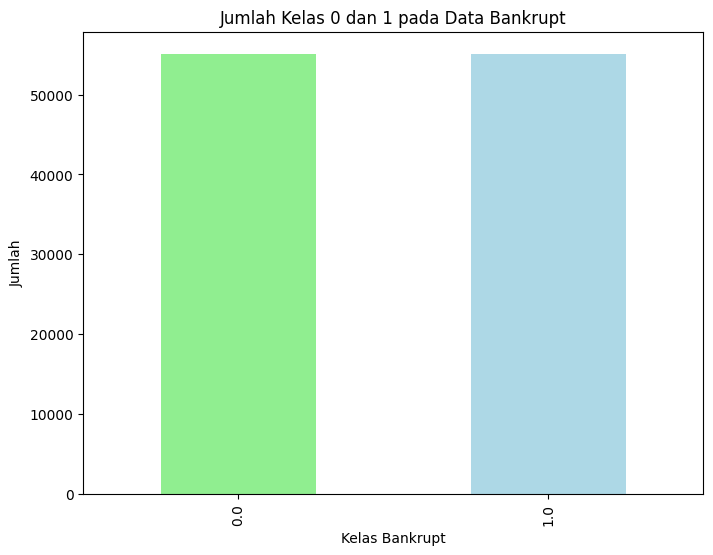

In [12]:
plt.figure(figsize=(8, 6))
ccount.plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Jumlah Kelas 0 dan 1 pada Data Bankrupt')
plt.xlabel('Kelas Bankrupt')
plt.ylabel('Jumlah')
plt.show()

#### Hasil analisis model
- SGD: menunjukkan performa model akurasi yang membaik, namun parameter evaluasi lainnya memiliki performa yang buruk.
- KNN Ball: Model mengalami overfitting ditunjukkan dengan nilai precision yang drastis menurun ketika model diuji/test.
- KNN Tree: Model mengalami overfitting juga dengan nilai precision yang juga drastis menurun ketika model diuji.
- Decision tree: Model sudah jelas mengalami overfit, ditunjukkan juga dengan nilai parameter precision yang drastis menurun dan juga f1-score.
- Random forest: Model mungkin sudah jelas mengalami overfitting, ditunjukkan dengan beberapa parameter evaluasi yang performanya menurun. Namun hal ini masih bisa diatasi dengan menggunakan nilai parameter yang benar dengan **Tuning**.
- Ada Boost: Modelnya overfitting
- Gradient Boosting: Modelnya overfitting juga, namun masih mungkin diterapkan **tuning**
- Gaussian Naive Bayes: Modelnya underfit
- SGD: Modelnya mungkin mengalami overfit. Namun kita coba tinjau lebih lanjut dengan **tuning**.

#### Memilih model yang tidak overfiting atau underfit untuk dilanjutkan pada tahap Hyperparameter atau Tuning


Berdasarkan hasil evaluasi **tiga model terbaik** adalah:
- [Random Forest]
- [Gradient Boost]
- [Stochastic Gradien Descent]


In [13]:
# y_true itu y_test
def model_report(y_true, y_pred):

    acc                     = accuracy_score(y_true, y_pred)
    pre                     = precision_score(y_true, y_pred)
    rec                     = recall_score(y_true, y_pred)
    f1                      = f1_score(y_true, y_pred)
    loss                    = log_loss(y_true, y_pred)

    print("accuracy:   {:3f}\nprecision:  {:3f}\nrecall:     {:3f}\nf1-score:   {:3f}\nloss:       {:3f}".
          format(acc, pre, rec, f1, loss))

In [14]:
# Fungsi Evaluasi Suatu Model dengan Confusion Matrix
def plot_confusion_matriks(y_true, y_pred):
    cm     = confusion_matrix(y_true, y_pred)
    tampil = ConfusionMatrixDisplay(confusion_matrix=cm)

    tampil.plot(cmap='Greys')

    plt.title('Confusion Matrix')
    plt.show()

### HyperTuning Machine Learning Model

#### Stochastic Gradien Descent Tuning Parameter

In [17]:
from sklearn.model_selection import RandomizedSearchCV

sgd_cv = SGDClassifier()

param_grid_sgd = {
    'alpha'              : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'loss'               : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty'            : ['l2', 'l1', 'elasticnet', 'none'],
    'learning_rate'      : ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter'           : [100, 500, 1000, 5000, 10000],
    'early_stopping'     : [True, False],
    'validation_fraction': [0.1, 0.2, 0.3],
    'random_state'       : [42]
}

In [18]:
cv_sgd = GridSearchCV(estimator=sgd_cv,
                      param_grid=param_grid_sgd,
                      cv=5,
                      scoring='accuracy')

cv_sgd.fit(X_train_balance, y_train_balance)

<IPython.core.display.Javascript object>

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'early_stopping': [True, False],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'max_iter': [100, 500, 1000, 5000, 10000],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'random_state': [42],
                         'validation_fraction': [0.1, 0.2, 0.3]},
             scoring='accuracy')

In [19]:
print('Tuning Hiperparameter SGD: ', cv_sgd.best_params_)

Tuning Hiperparameter SGD:  {'alpha': 0.1, 'early_stopping': False, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 500, 'penalty': 'l1', 'random_state': 42, 'validation_fraction': 0.1}


In [20]:
sgd_best = SGDClassifier(alpha=0.1,
                         loss='perceptron',
                         penalty='l1',
                         early_stopping=False,
                         learning_rate='optimal',
                         max_iter=500,
                         random_state=42,
                         validation_fraction=0.1)
sgd_best.fit(X_train_balance, y_train_balance)

SGDClassifier(alpha=0.1, loss='perceptron', max_iter=500, penalty='l1',
              random_state=42)

In [21]:
y_tt_sgd_best = sgd_best.predict(X_test)

In [22]:
model_report(y_test, y_tt_sgd_best)

accuracy:   0.519140
precision:  0.094487
recall:     0.706497
f1-score:   0.166681
loss:       17.331957


In [23]:
print('Klasifikasi Report dari SGD Classifier Best:')
print(classification_report(y_test, y_tt_sgd_best))

Klasifikasi Report dari SGD Classifier Best:
              precision    recall  f1-score   support

         0.0       0.96      0.51      0.66     18332
         1.0       0.09      0.71      0.17      1339

    accuracy                           0.52     19671
   macro avg       0.53      0.61      0.41     19671
weighted avg       0.90      0.52      0.63     19671



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

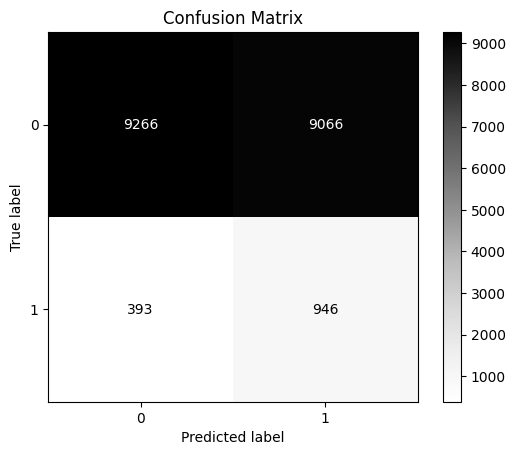

In [24]:
plot_confusion_matriks(y_test, y_tt_sgd_best)